<span style="
font-size:40px;
font-weight: bold;
">Deluppgift 1</span>


In [99]:
#Importerar moduler
import csv
import matplotlib.pyplot as plt
import numpy as np

#Funktion som omvandlar CSV fil till en lista av listor som innehåller raderna i CSV filen
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as csv_file:
        dataset = []
        csv_reader = csv.reader(csv_file, delimiter=";")
        for line in csv_reader:
            dataset.append(line)
    return dataset

#Funktion som skriver ut de 3 första raderna
def print_3_first_row(data):
    for i in range(0,3,1):
        print(data[i])

In [ ]:
#Använder den tidigare funktionen för att ange listorna till lokala variabler som kan anävndas
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")


#Skriver ut de tre första raderna
print("Lägenhets Priser:")
print_3_first_row(lghData)
print("")
print("Villa Priser:")
print_3_first_row(villaData)
print("")

<span style="font-size:40px; font-weight: bold;">Deluppgift 2</span>


In [101]:
#En funktion som hämtar användare input och kontrollerar den så att man inte kan ge fel input
def get_year_input():
    while True:
        år = input("Välj ett år mellan 2018-2023: ")
        if år in ["2018", "2019", "2020", "2021", "2022", "2023"]:
            return år
        else:
            print("Fel inmatning var vänlig ange ett år mellan 2018-2023")

#Samma som funktionen ovan fast för prisområde
def get_prisområde():
    while True:
        prisområde = input("Välj ett prisområde mellan 1-4 :")
        if prisområde in ["1", "2", "3", "4"]:
            return prisområde
        else:
            print("Fel prisområde ange ett nummer mellan 1-4")

#Huvudfunktion för deluppgiften
def jämförPris(lghData, villaData):

    #Definerar värderna på x-axeln eftersom de är statiska oberoende av kund/användare val
    x_values = ["jan", "feb", "mar", "apr", "maj", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]

    #Hämtar user input
    år = get_year_input()
    prisområde = get_prisområde()

    #Andvänder denna för att omvandla valet av prisområde till det index jag behöver i datan
    if prisområde == "1":
        Fast_index = 2
        Rör_index = 4
        print(1)
    elif prisområde == "2":
        Fast_index = 5
        Rör_index = 7
        print(2)
    elif prisområde == "3":
        Fast_index = 8
        Rör_index = 10
        print(3)
    else:
        Fast_index = 11
        Rör_index = 13
        print(4)

    #Splittar datan för villa samt lägenhet och tar ut endast den data som är för det valada året.
    year_list_lgh = []
    for line in lghData:
        if line[0] == år:
            year_list_lgh.append(line)

    year_list_villa = []
    for line in villaData:
        if line[0] == år:
            year_list_villa.append(line)

    #Skapar två listor för alla värderna så att de kan användas i grafen
    rörligt_lägenhet = []
    fast_lägenhet = []
    for line in year_list_lgh:
        rörligt_lägenhet.append(float(line[Rör_index]))
        fast_lägenhet.append(float(line[Fast_index]))

    rörligt_villa = []
    fast_villa = []
    for line in year_list_villa:
        rörligt_villa.append(float(line[Rör_index]))
        fast_villa.append(float(line[Fast_index]))

    #Skapar grafen nedan

    #Sätter grafens storlek
    plt.figure(figsize=(10, 6))
    
    #Matar in datan
    plt.plot(x_values, rörligt_lägenhet, label="Rörligt - lgh", color="blue")
    plt.plot(x_values, rörligt_villa, label="Rörligt - villa", color="orange")

    plt.plot(x_values, fast_lägenhet, label="Fast 1 år - lgh", color="green")
    plt.plot(x_values, fast_villa, label="Fast 1 år - villa", color="red")

    # Lägger till titlar och ettiketter
    plt.title(f"Elpriser prisområde SE{prisområde} år {år}")
    plt.xlabel("Månad")
    plt.ylabel("Pris [öre/kWh]")
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines

    #Visar graf
    plt.show()


1


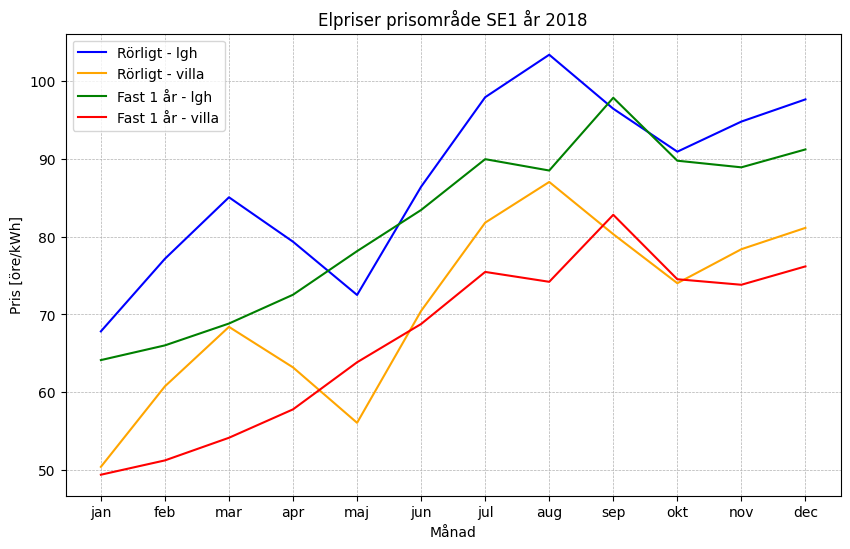

In [102]:
#Kör min funkrion med givna datan
jämförPris(lghData, villaData)

<span style="
font-size:40px;
font-weight: bold;
">Deluppgift 3</span>


In [120]:
def get_customer_input():
    while True:
        customer = input("Lägenhetskund (L) eller villakund (V)? : ")
        if customer in ["V", "L", "v", "l"]:
            return customer
        else:
            print("Fel inmatning skriv V eller L!")

#Funktion som räknar ut avrage
def calculate_avg(column_index, data):
    list_of_column_values = []
    for line in data:
        list_of_column_values.append(line[column_index])

    sum_lista_float = 0
    for i in list_of_column_values:
        sum_lista_float =  float(i) + sum_lista_float

    objects_in_lis = len(list_of_column_values)

    avg = sum_lista_float / objects_in_lis

    avg_rounded = round(avg, 2)
    return avg_rounded

def calculate_median(column_index, data):
    list_of_column_values = []
    for line in data:
        list_of_column_values.append(float(line[column_index]))

    sorted_dataset = sorted(list_of_column_values)

    object_count = len(sorted_dataset)

    if object_count % 2 == 1:
        median = sorted_dataset[object_count//2]
    
    else:
        first_value = sorted_dataset[object_count//2-1]
        second_value = sorted_dataset[object_count//2]
        median = (first_value + second_value) / 2
    
    median_rounded = round(median, 2)
    return median_rounded

def get_min_max_value(column_index, data):
    list_of_column_values = []
    for line in data:
        list_of_column_values.append(float(line[column_index]))
    sorted_dataset = sorted(list_of_column_values)
    min = sorted_dataset[0]
    max = sorted_dataset[-1]
    min_max_value = []
    min_max_value.append(min)
    min_max_value.append(max)

    #get min month
    min_max_month = []
    for line in data:
        if line[column_index] == str(min):
            min_max_month.append(line[1][:3])

    #get max month
    for line in data:
        if line[column_index] == str(max):
            min_max_month.append(line[1][:3])

    min_max = [min_max_value, min_max_month]
    return min_max    
    
def main_deluppgift3():

    customer_input = get_customer_input ()

    år = get_year_input ()

    year_list_lgh = []
    for line in lghData:
        if line[0] == år:
            year_list_lgh.append(line)

    year_list_villa = []
    for line in villaData:
        if line[0] == år:
            year_list_villa.append(line)


    if customer_input == "V" or "v":
        data = year_list_villa
        kund = "villakund"
    else:
        data = year_list_lgh
        kund = "lägenhetskund"

    SE1_fast_3_index = 3
    SE1_rör = 4

    SE2_fast_3_index = 6
    SE2_rör = 7

    SE3_fast_3_index = 9
    SE3_rör = 10

    SE4_fast_3_index = 12
    SE4_rör = 13

    #Min_max Varibles
    SE1_rör_min_max = get_min_max_value(SE1_rör, data)
    SE1_fast_min_max = get_min_max_value(SE1_fast_3_index, data)

    SE2_rör_min_max = get_min_max_value(SE2_rör, data)
    SE2_fast_min_max = get_min_max_value(SE2_fast_3_index, data)

    SE3_rör_min_max = get_min_max_value(SE3_rör, data)
    SE3_fast_min_max = get_min_max_value(SE3_fast_3_index, data)

    SE4_rör_min_max = get_min_max_value(SE4_rör, data)
    SE4_fast_min_max = get_min_max_value(SE4_fast_3_index, data)

    #Avrage Varibles
    SE1_rör_avg = calculate_avg(SE1_rör, data)
    SE1_fast_avg = calculate_avg(SE1_fast_3_index, data)

    SE2_rör_avg = calculate_avg(SE2_rör, data)
    SE2_fast_avg = calculate_avg(SE2_fast_3_index, data)

    SE3_rör_avg = calculate_avg(SE3_rör, data)
    SE3_fast_avg = calculate_avg(SE3_fast_3_index, data)

    SE4_rör_avg = calculate_avg(SE4_rör, data)
    SE4_fast_avg = calculate_avg(SE4_fast_3_index, data)

    #Median Varibles
    SE1_rör_median = calculate_median(SE1_rör, data)
    SE1_fast_median = calculate_median(SE1_fast_3_index, data)

    SE2_rör_median = calculate_median(SE2_rör, data)
    SE2_fast_median = calculate_median(SE2_fast_3_index, data)

    SE3_rör_median = calculate_median(SE3_rör, data)
    SE3_fast_median = calculate_median(SE3_fast_3_index, data)

    SE4_rör_median = calculate_median(SE4_rör, data)
    SE4_fast_median = calculate_median(SE4_fast_3_index, data)


    print("======================================================================================================")
    print("")
    print("")
    print(f"                        Analys av elpriserna för kategorin {kund:<9} år {år}                        ")
    print("")
    print("")
    print("              rörligt pris (öre/kWh)                              fast pris 3 år (öre/kWh)           ")
    print("Prisomr.  min -- (mån) max -- (mån)  medel    median        min -- (mån)  max -- (mån)  medel  median")
    print("------------------------------------------------------------------------------------------------------")
    print(f"SE1       {SE1_rör_min_max[0][0]:<5}   {SE1_rör_min_max[1][0]}  {SE1_rör_min_max[0][1]:<5}   {SE1_rör_min_max[1][1]}    {SE1_rör_avg:<5}    {SE1_rör_median:<5}         {SE1_fast_min_max[0][0]:<5}   {SE1_fast_min_max[1][0]}  {SE1_fast_min_max[0][1]:<5}   {SE1_fast_min_max[1][1]}    {SE1_fast_avg:<5}   {SE1_fast_median:<5}")
    print(f"SE2       {SE2_rör_min_max[0][0]:<5}   {SE2_rör_min_max[1][0]}  {SE2_rör_min_max[0][1]:<5}   {SE2_rör_min_max[1][1]}    {SE2_rör_avg:<5}    {SE2_rör_median:<5}         {SE2_fast_min_max[0][0]:<5}   {SE2_fast_min_max[1][0]}  {SE2_fast_min_max[0][1]:<5}   {SE2_fast_min_max[1][1]}    {SE2_fast_avg:<5}   {SE2_fast_median:<5}")
    print(f"SE3       {SE3_rör_min_max[0][0]:<5}   {SE3_rör_min_max[1][0]}  {SE3_rör_min_max[0][1]:<5}   {SE3_rör_min_max[1][1]}    {SE3_rör_avg:<5}    {SE3_rör_median:<5}         {SE3_fast_min_max[0][0]:<5}   {SE3_fast_min_max[1][0]}  {SE3_fast_min_max[0][1]:<5}   {SE3_fast_min_max[1][1]}    {SE3_fast_avg:<5}   {SE3_fast_median:<5}")
    print(f"SE4       {SE4_rör_min_max[0][0]:<5}   {SE4_rör_min_max[1][0]}  {SE4_rör_min_max[0][1]:<5}   {SE4_rör_min_max[1][1]}    {SE4_rör_avg:<5}    {SE4_rör_median:<5}         {SE4_fast_min_max[0][0]:<5}   {SE4_fast_min_max[1][0]}  {SE4_fast_min_max[0][1]:<5}   {SE4_fast_min_max[1][1]}    {SE4_fast_avg:<5}   {SE4_fast_median:<5}")
    print("======================================================================================================")


    prisområden = ["SE1", "SE2", "SE3", "SE4"]

    rörligt_values = {
        "rörligt min" : (SE1_rör_min_max[0][0], SE2_rör_min_max[0][0], SE3_rör_min_max[0][0], SE4_rör_min_max[0][0]),
        "rörligt max" : (SE1_rör_min_max[0][1], SE2_rör_min_max[0][1], SE3_rör_min_max[0][1], SE4_rör_min_max[0][1]),
        "rörligt medel" : (SE1_rör_avg, SE2_rör_avg, SE3_rör_avg, SE4_rör_avg),
        "rörligt median" : (SE1_rör_median, SE2_rör_median, SE3_rör_median, SE4_rör_median)
    }

    fast_values = {
        "fast 3år - min" : (SE1_fast_min_max[0][0], SE2_fast_min_max[0][0], SE3_fast_min_max[0][0], SE4_fast_min_max[0][0]),
        "fast 3år - max" : (SE1_fast_min_max[0][1], SE2_fast_min_max[0][1], SE3_fast_min_max[0][1], SE4_fast_min_max[0][1]),
        "fast 3år - medel" : (SE1_fast_avg, SE2_fast_avg, SE3_fast_avg, SE4_fast_avg),
        "fast 3år - median" : (SE1_fast_median, SE2_fast_median, SE3_fast_median, SE4_fast_median)
    }

    # Plotting
    bar_width = 0.2
    r = np.arange(len(prisområden))

    plt.figure(figsize=(15,7))

    # First chart
    for idx, (key, value) in enumerate(rörligt_values.items()):
        plt.bar(r + idx*bar_width, value, width=bar_width, label=key)

    plt.xlabel("Prisområden")
    plt.ylabel("pris (öre/kWh)")
    plt.title("Elpriser rörligt för villakund i prisområdena SE1-SE4 år 2020")
    plt.xticks(r + bar_width, prisområden)
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines

    # Adjust the layout and show the first chart
    plt.tight_layout()
    plt.show()

    # Second chart
    plt.figure(figsize=(15,7))

    for idx, (key, value) in enumerate(fast_values.items()):
        plt.bar(r + idx*bar_width, value, width=bar_width, label=key)
    
    plt.xlabel("prisområden")
    plt.ylabel("pris (öre/kWh)")
    plt.title("Elpriser fast 3 år för villakund i prisområdena SE1-SE4 år 2020")
    plt.xticks(r + bar_width, prisområden)
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines
    
    # Adjust the layout and show the second chart
    plt.tight_layout()
    plt.show()
    





                        Analys av elpriserna för kategorin villakund år 2020                        


              rörligt pris (öre/kWh)                              fast pris 3 år (öre/kWh)           
Prisomr.  min -- (mån) max -- (mån)  medel    median        min -- (mån)  max -- (mån)  medel  median
------------------------------------------------------------------------------------------------------
SE1       17.82   apr  42.2    jan    28.92    29.72         45.05   dec  57.43   jan    49.19   48.47
SE2       17.58   apr  42.2    jan    28.8     29.4          45.05   dec  57.35   jan    49.07   48.42
SE3       21.72   jul  55.11   aug    38.86    40.48         48.47   aug  59.93   jan    51.41   50.64
SE4       28.68   maj  63.28   sep    45.63    43.67         51.21   aug  62.13   jan    54.45   53.79


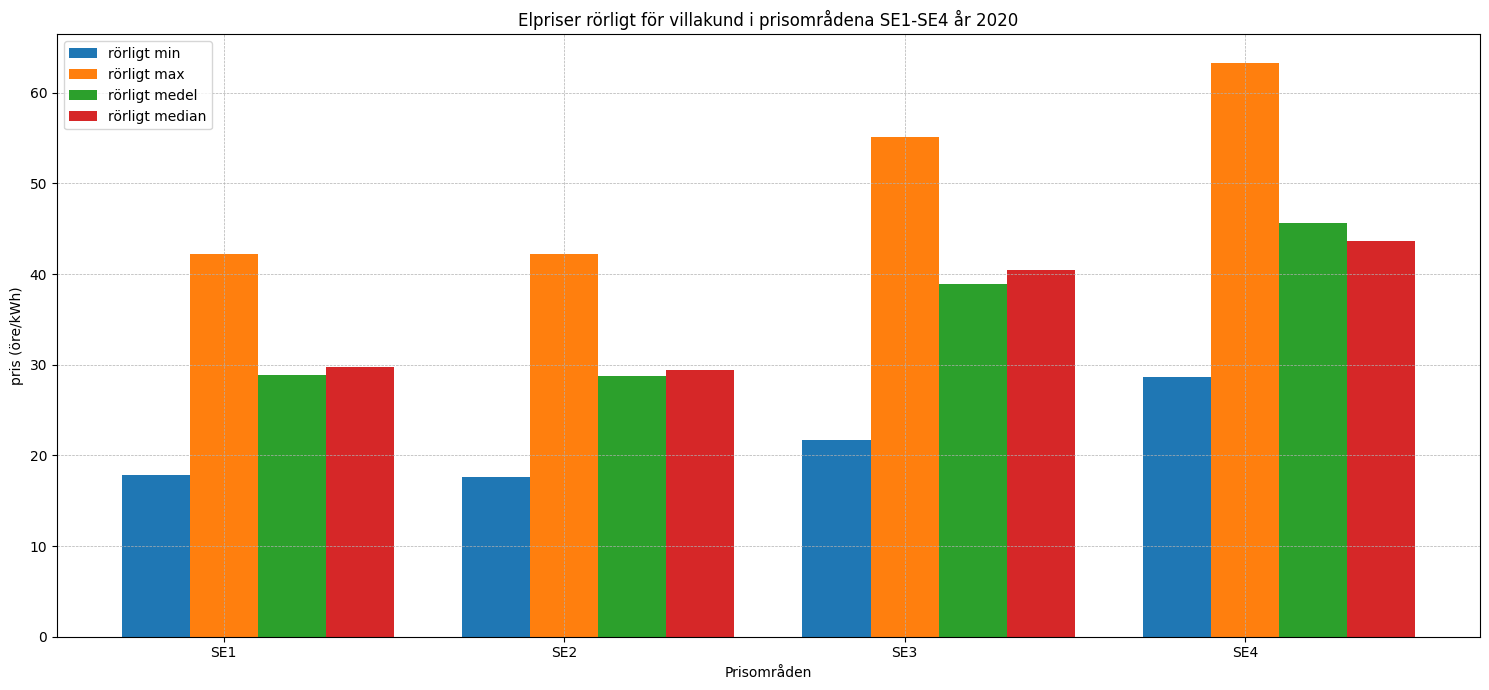

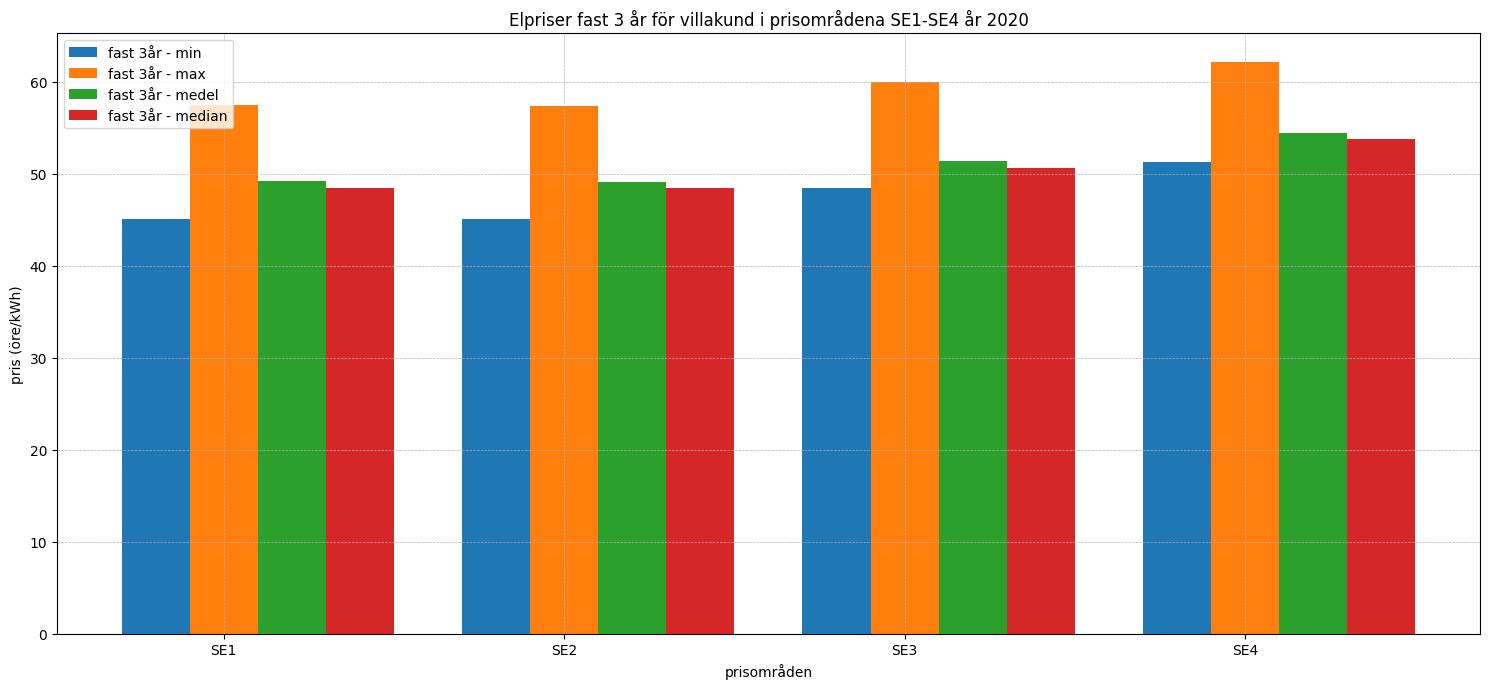

In [121]:
main_deluppgift3()

<span style="font-size:40px; font-weight: bold;">Deluppgift 4</span>
